# Data Analysis

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter

In [4]:
hair_dryer = pd.read_csv('Problem_C_Data/hair_dryer.tsv', sep='\t')
hair_dryer.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


In [5]:
hair_dryer.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.147000e+04,1.147000e+04,11470.000000,11470.000000,11470.000000
mean,2.815122e+07,4.846338e+08,4.116042,2.179076,2.563296
std,1.523877e+07,2.873240e+08,1.300333,14.241304,15.382528
min,1.246400e+04,4.239600e+05,1.000000,0.000000,0.000000
25%,1.491441e+07,2.351060e+08,4.000000,0.000000,0.000000
50%,2.707123e+07,4.867740e+08,5.000000,0.000000,0.000000
75%,4.233644e+07,7.322523e+08,5.000000,1.000000,1.000000
max,5.309637e+07,9.994366e+08,5.000000,499.000000,575.000000


In [8]:
hair_dryer.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object

### Anaylsis of Star Rating of Hair Dryer over time

In [11]:
hair_dryer['review_date'] = pd.to_datetime(hair_dryer['review_date'])
hair_dryer.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,2015-08-31
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",2015-08-31
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,2015-08-31
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,2015-08-31
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,2015-08-31


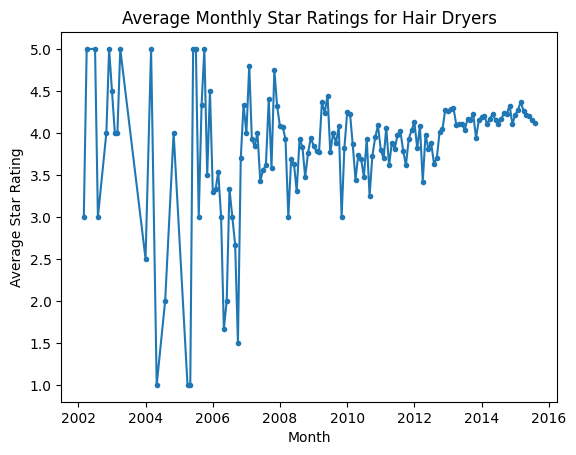

In [27]:
hair_dryer_month_rating = (
    hair_dryer.groupby(hair_dryer["review_date"].dt.to_period("M"))["star_rating"]
    .mean()
    .reset_index()
)

plt.plot(
    hair_dryer_month_rating["review_date"].dt.to_timestamp(),
    hair_dryer_month_rating["star_rating"], marker='.'
)
plt.title("Average Monthly Star Ratings for Hair Dryers")
plt.xlabel("Month")
plt.ylabel("Average Star Rating")
plt.show()

In [40]:
hair_dryer_monthly_rating = (
    hair_dryer.groupby(
        [hair_dryer["review_date"].dt.year, hair_dryer["review_date"].dt.month]
    )["star_rating"]
    .mean()
    .unstack(0)
)

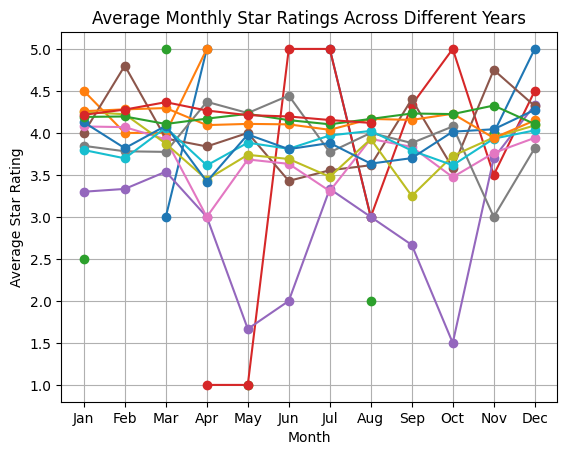

In [57]:
for year in hair_dryer_monthly_rating.columns:
    plt.plot(
        hair_dryer_monthly_rating.index,
        hair_dryer_monthly_rating[year],
        marker="o",
        label=f"Year {year}",
    )

plt.title("Average Monthly Star Ratings Across Different Years")
plt.xlabel("Month")
plt.ylabel("Average Star Rating")
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.grid(True)
# plt.legend(title='Year')
plt.show()

### Analysis of Helpfulness Rating Over Time

In [53]:
hair_dryer_tv = hair_dryer[hair_dryer["total_votes"] > 0]

hair_dryer_tv["helpfulness_ratio"] = (
    hair_dryer_tv["helpful_votes"] / hair_dryer_tv["total_votes"]
)

helpfulness_monthly = (
    hair_dryer_tv.groupby(hair_dryer_tv["review_date"].dt.month)["helpfulness_ratio"]
    .mean()
    .reset_index()
)

helpfulness_monthly

C:\Users\abeme\AppData\Local\Temp\ipykernel_3208\458842797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair_dryer_tv["helpfulness_ratio"] = (


,review_date,helpfulness_ratio
0,1,0.726990
1,2,0.720044
2,3,0.783336
3,4,0.741290
4,5,0.797702
5,6,0.795194
6,7,0.748236
7,8,0.739015
8,9,0.742584
9,10,0.732963


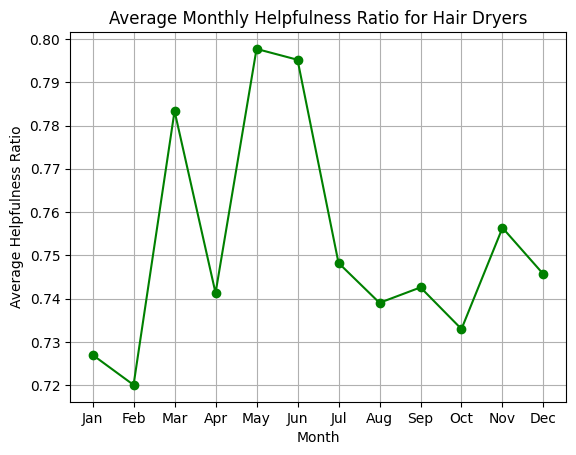

In [56]:
plt.plot(helpfulness_monthly['review_date'], helpfulness_monthly['helpfulness_ratio'], marker='o', linestyle='-', color='green')
plt.title('Average Monthly Helpfulness Ratio for Hair Dryers')
plt.xlabel('Month')
plt.ylabel('Average Helpfulness Ratio')
plt.grid(True)
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.show()

### Correlation Between Star Rating and Helpfulness

In [60]:
hair_dryer_corr = hair_dryer_tv['star_rating'].corr(hair_dryer_tv['helpfulness_ratio'])
print("Correlation between Helpfulness and Star Rating:", hair_dryer_corr)

Correlation between Helpfulness and Star Rating: 0.10384709836195145


### Correlation Between Review Length and Helpfulness

In [66]:
hair_dryer_tv.loc[:, 'review_length'] = hair_dryer_tv['review_body'].apply(lambda x: len(str(x)))
hd_length_help_corr = hair_dryer_tv['review_length'].corr(hair_dryer_tv['helpfulness_ratio'])
hd_length_help_corr

0.08756962722647392

### Correlation Between Start Rating and Number of Reviews

In [113]:
hd_review_num = hair_dryer_tv.groupby('product_id').agg({
    'star_rating': 'mean',
    'review_id': 'count'
})
hd_review_num = hd_review_num.rename(columns={'review_id': 'review_count'})

hd_review_num['star_rating'].corr(hd_review_num['review_count'])

-0.027340796108633065

### General Coorelation in between Hair Dryer (hd) category

In [63]:
hd_num_data = hair_dryer_tv[['star_rating', 'helpful_votes', 'total_votes', 'helpfulness_ratio']]
hd_corr_matrix = hd_num_data.corr()
hd_corr_matrix

,star_rating,helpful_votes,total_votes,helpfulness_ratio
star_rating,1.000000,-0.001503,-0.017546,0.103847
helpful_votes,-0.001503,1.000000,0.995176,0.108962
total_votes,-0.017546,0.995176,1.000000,0.076965
helpfulness_ratio,0.103847,0.108962,0.076965,1.000000


### Sentiment analysis on Hair Dryer reviews

In [86]:
def tokenize(text):
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [
        word for word in tokens if word.isalpha() and word not in stop_words
    ]
    return filtered_tokens

In [93]:
hair_dryer_token = hair_dryer.dropna(subset=["review_body"])
hair_dryer_token["tokens"] = hair_dryer_token["review_body"].apply(
    lambda x: tokenize(str(x))
)

C:\Users\abeme\AppData\Local\Temp\ipykernel_3208\341372113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair_dryer_token["tokens"] = hair_dryer_token["review_body"].apply(


In [100]:
hair_dryer_token['polarity'] = hair_dryer_token['review_body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
hair_dryer_token['subjectivity'] = hair_dryer_token['review_body'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

analyzer = SentimentIntensityAnalyzer()
hair_dryer_token['vader_compound'] = hair_dryer_token['review_body'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

C:\Users\abeme\AppData\Local\Temp\ipykernel_3208\953328707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair_dryer_token['polarity'] = hair_dryer_token['review_body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
C:\Users\abeme\AppData\Local\Temp\ipykernel_3208\953328707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair_dryer_token['subjectivity'] = hair_dryer_token['review_body'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
C:\Users\abeme\AppData\Local\Temp\ipykernel_3208\9

### Most common used words in hair dryer reviews

In [ ]:
all_tokens = sum(hair_dryer_token['tokens'].tolist(), [])

token_counts = Counter(all_tokens)
token_counts.most_common(20)

[('hair', 12913),
 ('dryer', 10801),
 ('one', 4471),
 ('br', 4339),
 ('great', 3292),
 ('use', 2735),
 ('like', 2565),
 ('would', 2355),
 ('love', 2284),
 ('good', 2171),
 ('dry', 2104),
 ('product', 2087),
 ('time', 1918),
 ('works', 1915),
 ('blow', 1892),
 ('used', 1792),
 ('well', 1735),
 ('cord', 1676),
 ('really', 1632),
 ('heat', 1513)]

### Senttment Score Graph of Hair Dryers Review

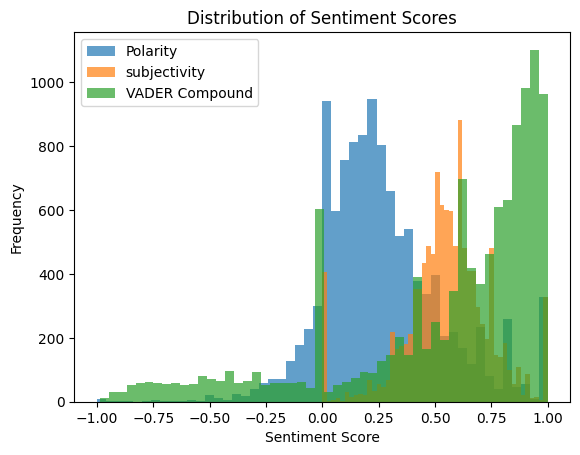

In [101]:
plt.hist(hair_dryer_token['polarity'], bins=50, alpha=0.7, label='Polarity')
plt.hist(hair_dryer_token['subjectivity'], bins=50, alpha=0.7, label='subjectivity')
plt.hist(hair_dryer_token['vader_compound'], bins=50, alpha=0.7, label='VADER Compound')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Impact of Verified Purchases of Hair Dryers

In [117]:
hd_verified = hair_dryer_tv.groupby('verified_purchase').agg({
    'star_rating': 'mean',
    'helpfulness_ratio': 'mean'
}).reset_index()
hd_verified

,verified_purchase,star_rating,helpfulness_ratio
0,N,3.47732,0.765230
1,Y,3.82733,0.746834


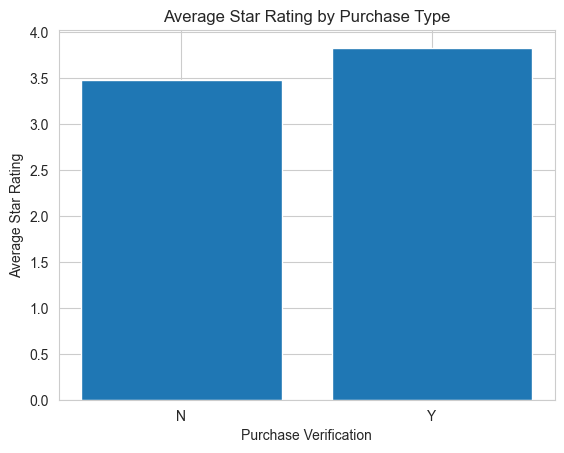

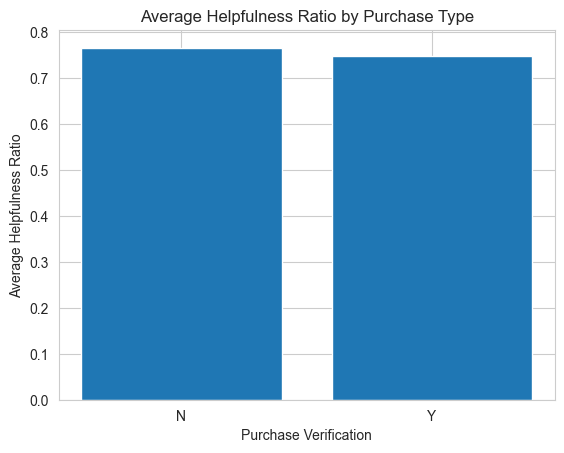

In [123]:
plt.bar(hd_verified['verified_purchase'], hd_verified['star_rating'], )
plt.title('Average Star Rating by Purchase Type')
plt.xlabel('Purchase Verification')
plt.ylabel('Average Star Rating')
plt.show()

plt.bar(hd_verified['verified_purchase'], hd_verified['helpfulness_ratio'])
plt.title('Average Helpfulness Ratio by Purchase Type')
plt.xlabel('Purchase Verification')
plt.ylabel('Average Helpfulness Ratio')

plt.show()
